In [4]:
DATA_FILE_NAME = 'data/05-03-2022_labeled_comments.csv' 

In [5]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
from modules.read_dataframe import Comments

comments = Comments(dataframe_path=DATA_FILE_NAME)

-> Labeled comments dataframe avaliable in data/05-03-2022_labeled_comments.csv


# Análise de comentários

In [7]:
NUMERIC_CARACTERS = '0123456789'

def find_numeric_words(dictionary, exclude = []):
    result = []
    for key in dictionary.keys():
        for caracter in NUMERIC_CARACTERS:
            if caracter in key and key not in exclude:
                result.append(key)
                break
            
    return result

def find_alphanumeric_words(list_of_words):
    result = []
    for word in list_of_words:
        for char in word:
            if char not in NUMERIC_CARACTERS:
                result.append(word)
                break
    return result
    
def find_uppercased_words(dictionary, exclude = []):
    result = []
    for key in dictionary.keys():
        if key == key.upper() and key not in exclude:
            result.append(key)
            
    return result

def find_comments_with_laugh(comments):
    result = []
    for comment in comments:
        if comment.count('k') > 2 or comment.count('K') > 2 or comment.count('haha') > 0:
            result.append(comment)
    return result

def print_info(vocabulary, content, title):
    numeric_words = find_numeric_words(vocabulary)
    alphanumeric_words = find_alphanumeric_words(numeric_words)
    uppercased = find_uppercased_words(vocabulary, numeric_words)
    laugh_comments = find_comments_with_laugh(content)

    pt_stopwords = nltk.corpus.stopwords.words('portuguese')
    uppercased_stopwords = [word.upper() for word in pt_stopwords]
    pt_stopwords = pt_stopwords + uppercased_stopwords

    stopwords_in_comments = [x for x in vocabulary.keys() if x in pt_stopwords]
    print('Total words', len(vocabulary.keys()))
    print('Total stopwords:',len(stopwords_in_comments))
    print('Total laughter', len(laugh_comments))
    print('Total uppercased words', len(uppercased))
    print('Total alphanumeric words', len(alphanumeric_words))
    
    all_summary = " ".join(s.upper() for s in content)
    all_summary = ' '.join([a for a in all_summary.split(' ')])
    wordcloud = WordCloud(stopwords=pt_stopwords,
                          colormap='PuRd',
                          background_color='#FFFAFA', width=1600,
                          max_words=100,
                          height=800).generate(all_summary.lower())
    fig, ax = plt.subplots(figsize=(16,8))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wordcloud)
    
    wordcloud.to_file(f'{title}_word_cloud.png',);

Total words 8779
Total stopwords: 227
Total laughter 139
Total uppercased words 777
Total alphanumeric words 57


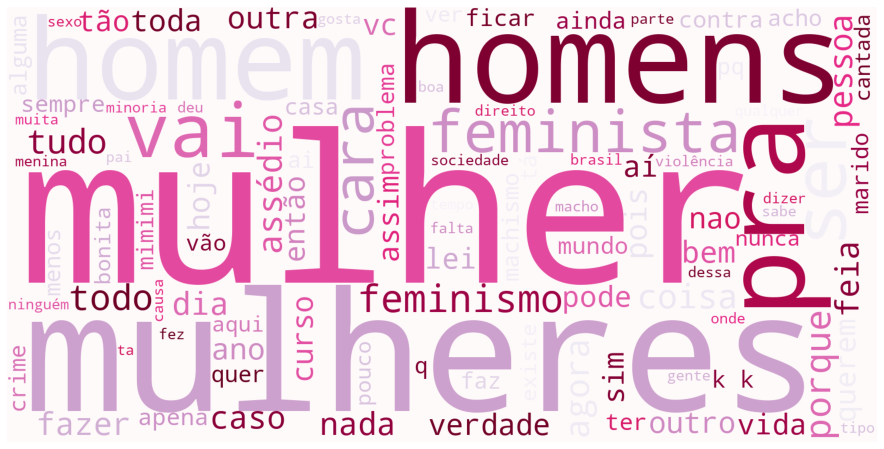

In [8]:
print_info(comments.sexist_vocabulary, comments.sexist_comments['content'], 'sexist')

Total words 8511
Total stopwords: 225
Total laughter 81
Total uppercased words 736
Total alphanumeric words 38


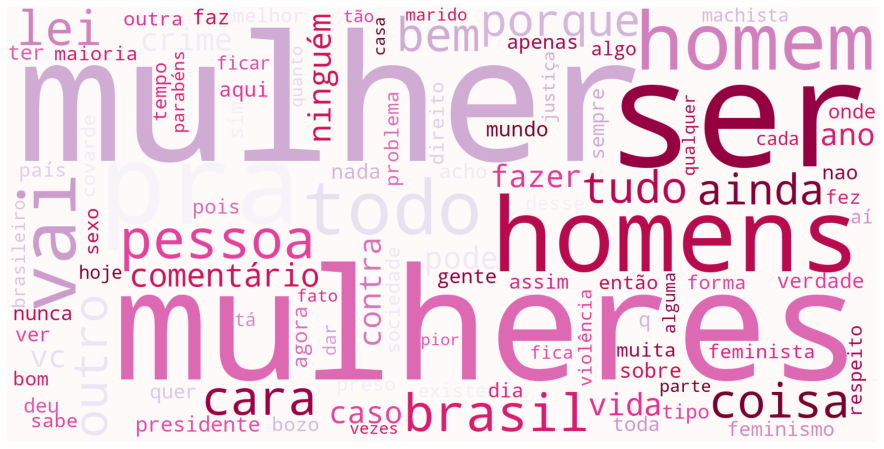

In [9]:
print_info(comments.not_sexist_vocabulary, comments.not_sexist_comments['content'], 'not_sexist')

Total words 690
Total stopwords: 78
Total laughter 3
Total uppercased words 14
Total alphanumeric words 0


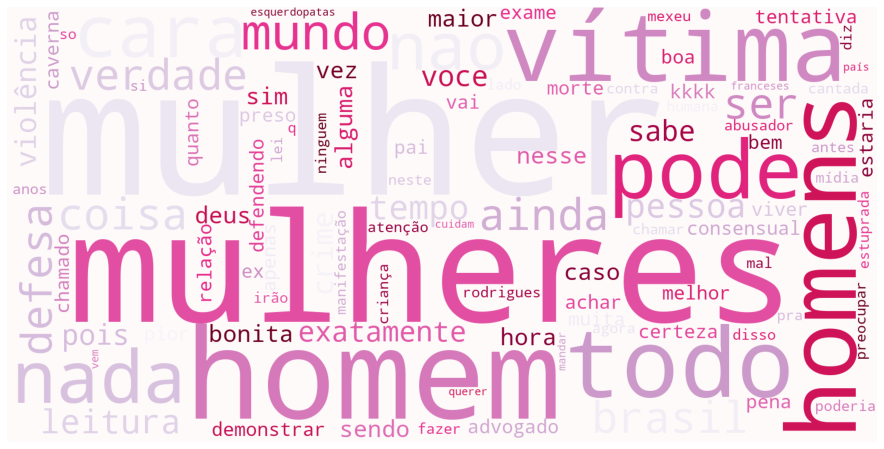

In [10]:
print_info(comments.undefined_vocabulary, comments.undefined_comments['content'], 'undefined')

In [ ]:
# import pandas as pd

# likes_dislikes_query = '''
# select sum(likes) as sum_likes,
#        sum(dislikes) as sum_dislikes,
#        avg(likes) as avg_likes,
#        avg(dislikes) as avg_dislikes,
#        min(likes) as min_likes,
#        min(dislikes) as min_dislikes,
#        max(likes) as max_likes,
#        max(dislikes) as max_dislikes,
#        median(likes) as median_likes,
#        median(dislikes) as median_dislikes,
#        case
#             when avg > 0.5 then 'sexista'
#             when avg < 0.5 then 'não sexista'
#             when avg = 0.5 then 'não definido'
#         end as label
# from results
# group by (label);
# '''

# from modules.database_connector import Database
# print('-> Configuring database...')
# database = Database()
# conn = database.get_connection()
# print('-> Database setup is done!')

# likes_dislikes_df = pd.read_sql_query(likes_dislikes_query, conn)
# likes_dislikes_df.to_csv('data/likes_dislikes.csv', sep=';')

In [ ]:
# comments.sexist_comments['content'].to_csv('data/sexist_comments.csv')

In [ ]:
comments.dataframe